1일반         0.400000
2아스트레이      0.821053
3풍백         0.689474
4에스토크       0.715789
5바크스툼       0.689474
6에이번의 상처    0.652632
7브람스        0.689474
8트라곤        0.689474
9프뉴마        0.689474
Name: 속도, dtype: float64
                속도      수조저항      모래저항      세이렌저항      한파저항     폭풍우저항  \
배                                                                       
1일반       0.300000  4.725816  3.605551   3.785939  4.163332  3.785939   
2아스트레이    0.637337  8.413301  7.588850  10.244668  7.065276  7.228517   
3풍백       0.597118  8.987971  9.032430   6.781468  6.002923  6.765063   
4에스토크     0.585247  7.267648  5.916574   6.687249  6.252485  9.485908   
5바크스툼     0.597118  5.795239  7.608859   6.148266  7.680384  6.270697   
6에이번의 상처  0.580582  7.416593  5.315210   6.244062  7.519176  7.834920   
7브람스      0.597118  9.482517  5.678522   7.267648  6.041281  5.948610   
8트라곤      0.597118  7.726313  4.880442   6.199415  5.486293  6.556547   
9프뉴마      0.597118  8.129795  6.501012   6.742984  6.953

C:\Users\sec\AppData\Local\Temp\ipykernel_18260\289659305.py:85: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std_all = grouped1.std()
C:\Users\sec\AppData\Local\Temp\ipykernel_18260\289659305.py:116: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax4 = sns.distplot(y, hist=False, label="y")
C:\Users\sec\AppData\Local\Temp\ipykernel_18260\289659305.py:117: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ad

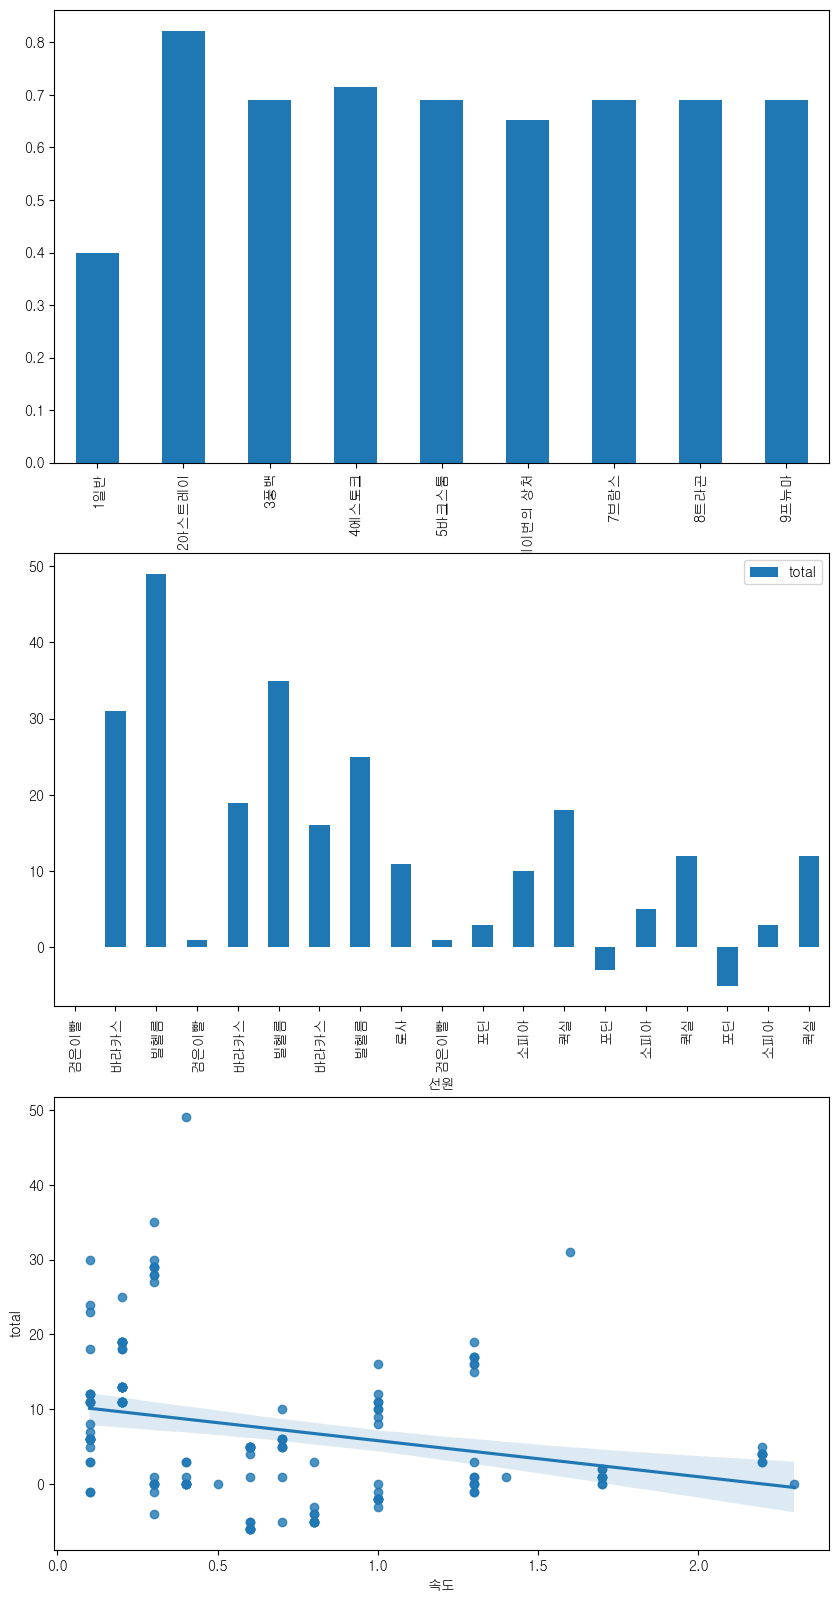

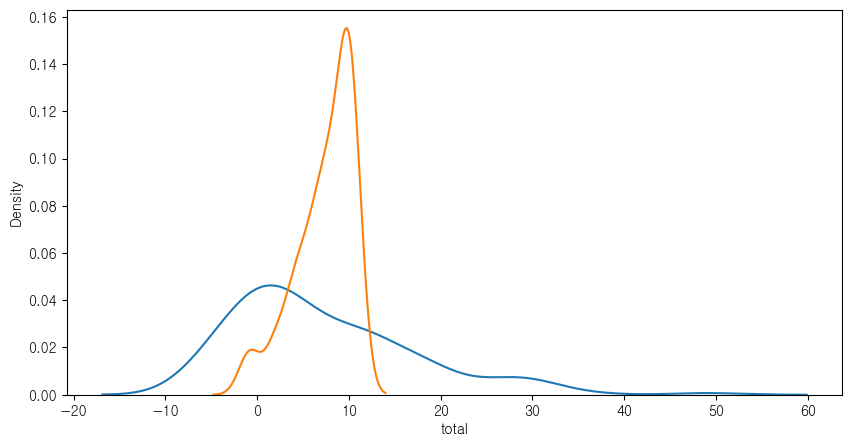

90.67386027993324
7.3602084265288195


In [8]:

from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

url = "https://lostark.inven.co.kr/dataninfo/crew/"
resp = requests.get(url)    
soup = BeautifulSoup(resp.text, 'html.parser')   
name = []
ship = []
speed = []
res1 = []
res2 = []
res3 = []
res4 = []
res5 = []
res6 = []
all = []

html_name = soup.select("td.name")
html_ship = soup.select("td.name")
html_speed = soup.select("td.etc20")
html_res1 = soup.select("td.res1")
html_res2 = soup.select("td.res2")
html_res3 = soup.select("td.res3")
html_res4 = soup.select("td.res4")
html_res5 = soup.select("td.res5")
html_res6 = soup.select("td.res6")

for i in html_name:
    etf_name = re.findall('\\n(.*)\\n', i.text)
    name += etf_name
for i in html_ship:
    etf_name = re.findall('급 (.*) 선', i.text)
    ship += etf_name
for i in html_speed:
    speed += map(float,re.findall('-?\d+.\d+', i.text))
for i in html_res1:
    res1 += map(float, re.findall('-?\d+', i.text))
for i in html_res2:
    res2 += map(float, re.findall('-?\d+', i.text))
for i in html_res3:
    res3 += map(float, re.findall('-?\d+', i.text))
for i in html_res4:
    res4 += map(float, re.findall('-?\d+', i.text))
for i in html_res5:
    res5 += map(float, re.findall('-?\d+', i.text))
for i in html_res6:
    res6 += map(float, re.findall('-?\d+', i.text))

all = (name , ship , speed , res1 , res2 , res3 , res4 , res5 , res6)
col = ['선원','배','속도','수조저항','모래저항','세이렌저항','한파저항','폭풍우저항','망자저항']
data = dict(zip(col, all))

all2 = ( ship , speed , res1 , res2 , res3 , res4 , res5 , res6)
col2 = ['배','속도','수조저항','모래저항','세이렌저항','한파저항','폭풍우저항','망자저항']
data2 = dict(zip(col2, all2))

df1 = pd.DataFrame(data)
df2 = pd.DataFrame(data2)

df1['total'] = df1['수조저항'] + df1['모래저항'] + df1['세이렌저항'] + df1['한파저항'] + df1['폭풍우저항'] + df1['망자저항']
df2['total'] = df2['수조저항'] + df2['모래저항'] + df2['세이렌저항'] + df2['한파저항'] + df2['폭풍우저항'] + df2['망자저항']

grouped1 = df1.groupby('배')
grouped2 = df2['속도'].groupby(data['배']).mean()

df3 = df1[['선원','배','total']]
grouped3 = df3.groupby('배')
grouped4 = grouped3.get_group('2아스트레이')
# 각 그룹별 항목 확인
# for key, group in grouped2:
#     print("* key :", key)
#     print('* number :', len(group))
#     print(group.head())
#     print('\n')
print(grouped2)
std_all = grouped1.std()
print(std_all)

agg_all = grouped1.agg(['min','max'])
print(agg_all)

fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

grouped2.plot(kind='bar',ax=ax1)
grouped4.plot(x='선원',y='total',kind='bar',ax=ax2)

ndf = df1[['속도','total']]
sns.regplot(x='속도',y='total',data=ndf,ax=ax3)

X=ndf[['속도']]
y=ndf['total']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_hat = lr.predict(X)

plt.figure(figsize=(10,5))
ax4 = sns.distplot(y, hist=False, label="y")
ax5 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax4)


plt.show()
plt.close()

import sklearn.metrics as sm
print(sm.mean_squared_error(y, y_hat))
print(sm.mean_absolute_error(y, y_hat))
